In [26]:
#Soru 1 
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 


df = pd.read_csv("persona.csv")
df.describe().T


,count,mean,std,min,25%,50%,75%,max
PRICE,5000.0,34.1320,12.464897,9.0,29.0,39.0,39.0,59.0
AGE,5000.0,23.5814,8.995908,15.0,17.0,21.0,27.0,66.0


In [6]:
df.sample()

,PRICE,SOURCE,SEX,COUNTRY,AGE
4217,39,android,male,fra,46


In [23]:
un_source = df["SOURCE"].unique()
un_source 


array(['android', 'ios'], dtype=object)

In [22]:
nun_source = df["SOURCE"].nunique()
nun_source

2

<AxesSubplot:xlabel='SOURCE', ylabel='count'>

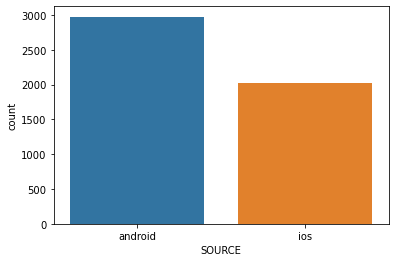

In [20]:
sns.countplot(x = df["SOURCE"], data = df)

In [16]:
df["SOURCE"].value_counts()

android    2974
ios        2026
Name: SOURCE, dtype: int64

In [25]:
df["PRICE"].nunique()

6

In [27]:
df.head()

,PRICE,SOURCE,SEX,COUNTRY,AGE
0,39,android,male,bra,17
1,39,android,male,bra,17
2,49,android,male,bra,17
3,29,android,male,tur,17
4,49,android,male,tur,17


In [28]:
df["PRICE"].value_counts()

29    1305
39    1260
49    1031
19     992
59     212
9      200
Name: PRICE, dtype: int64

In [29]:
df["COUNTRY"].value_counts()

usa    2065
bra    1496
deu     455
tur     451
fra     303
can     230
Name: COUNTRY, dtype: int64

In [36]:
df.groupby("COUNTRY")["PRICE"].aggregate(sum) 

COUNTRY
bra    51354
can     7730
deu    15485
fra    10177
tur    15689
usa    70225
Name: PRICE, dtype: int64

In [31]:
df["SOURCE"].value_counts() 

android    2974
ios        2026
Name: SOURCE, dtype: int64

In [33]:
df.groupby("COUNTRY")["PRICE"].aggregate("mean")


COUNTRY
bra    34.327540
can    33.608696
deu    34.032967
fra    33.587459
tur    34.787140
usa    34.007264
Name: PRICE, dtype: float64

In [34]:
df.groupby("SOURCE")["PRICE"].aggregate("mean")

SOURCE
android    34.174849
ios        34.069102
Name: PRICE, dtype: float64

In [35]:
df.groupby(["COUNTRY","SOURCE"])["PRICE"].aggregate("mean")

COUNTRY  SOURCE 
bra      android    34.387029
         ios        34.222222
can      android    33.330709
         ios        33.951456
deu      android    33.869888
         ios        34.268817
fra      android    34.312500
         ios        32.776224
tur      android    36.229437
         ios        33.272727
usa      android    33.760357
         ios        34.371703
Name: PRICE, dtype: float64

In [39]:
df.groupby(["COUNTRY","SOURCE","SEX","AGE"])["PRICE"].aggregate("mean")

COUNTRY  SOURCE   SEX     AGE
bra      android  female  15     38.714286
                          16     35.944444
                          17     35.666667
                          18     32.255814
                          19     35.206897
                                   ...    
usa      ios      male    42     30.250000
                          50     39.000000
                          53     34.000000
                          55     29.000000
                          59     46.500000
Name: PRICE, Length: 348, dtype: float64

In [90]:
agg_df = df.groupby(["COUNTRY","SOURCE","SEX","AGE"])["PRICE"].aggregate("mean").reset_index().sort_values("PRICE", ascending = False)

In [52]:
df["AGE_CUT"] = pd.cut(df["AGE"], bins = [0,18,23,30,40,70], labels = ["0_18","19_23","24_30","31_40", "41_70"])

In [46]:
df.head()

,PRICE,SOURCE,SEX,COUNTRY,AGE,AGE_CUT
0,39,android,male,bra,17,0_18
1,39,android,male,bra,17,0_18
2,49,android,male,bra,17,0_18
3,29,android,male,tur,17,0_18
4,49,android,male,tur,17,0_18


In [47]:
df.groupby(["COUNTRY","SOURCE","SEX","AGE"])["PRICE"].aggregate("mean").reset_index().sort_values("PRICE", ascending = False)

,COUNTRY,SOURCE,SEX,AGE,PRICE
47,bra,android,male,46,59.0
290,usa,android,male,36,59.0
167,fra,android,female,24,59.0
339,usa,ios,male,32,54.0
125,deu,android,female,36,49.0
...,...,...,...,...,...
319,usa,ios,female,38,19.0
315,usa,ios,female,30,19.0
97,can,android,female,27,19.0
171,fra,android,male,18,19.0


In [54]:
df.sort_values("PRICE",ascending = False).head(10)

,PRICE,SOURCE,SEX,COUNTRY,AGE,AGE_CUT
4503,59,ios,male,fra,15,0_18
995,59,android,male,usa,47,41_70
3343,59,android,male,tur,24,24_30
2294,59,android,male,fra,15,0_18
3716,59,ios,male,bra,16,0_18
3150,59,android,male,deu,18,0_18
4623,59,android,male,bra,15,0_18
2298,59,ios,female,bra,37,31_40
1460,59,ios,male,usa,27,24_30
611,59,ios,male,fra,26,24_30


In [58]:
df

,PRICE,SOURCE,SEX,COUNTRY,AGE,AGE_CUT
0,39,android,male,bra,17,0_18
1,39,android,male,bra,17,0_18
2,49,android,male,bra,17,0_18
3,29,android,male,tur,17,0_18
4,49,android,male,tur,17,0_18
...,...,...,...,...,...,...
4995,29,android,female,bra,31,31_40
4996,29,android,female,bra,31,31_40
4997,29,android,female,bra,31,31_40
4998,39,android,female,bra,31,31_40


In [72]:
df["customers_level_based"] = [countryy.upper() + "_" + sourcee.upper() +"_"+ sexx.upper() +"_"+ age_catt.upper() for countryy,sourcee,sexx,age_catt in zip(df["COUNTRY"],df["SOURCE"],df["SEX"],df["AGE_CUT"])]

In [73]:
df.head()

,PRICE,SOURCE,SEX,COUNTRY,AGE,AGE_CUT,customers_level_based
0,39,android,male,bra,17,0_18,BRA_ANDROID_MALE_0_18
1,39,android,male,bra,17,0_18,BRA_ANDROID_MALE_0_18
2,49,android,male,bra,17,0_18,BRA_ANDROID_MALE_0_18
3,29,android,male,tur,17,0_18,TUR_ANDROID_MALE_0_18
4,49,android,male,tur,17,0_18,TUR_ANDROID_MALE_0_18


In [81]:
grouped_clb = df.groupby("customers_level_based")["PRICE"].aggregate("mean").reset_index()
grouped_clb

,customers_level_based,PRICE
0,BRA_ANDROID_FEMALE_0_18,35.439394
1,BRA_ANDROID_FEMALE_19_23,34.114943
2,BRA_ANDROID_FEMALE_24_30,34.540541
3,BRA_ANDROID_FEMALE_31_40,34.696203
4,BRA_ANDROID_FEMALE_41_70,35.086957
...,...,...
104,USA_IOS_MALE_0_18,34.054348
105,USA_IOS_MALE_19_23,35.304348
106,USA_IOS_MALE_24_30,36.096774
107,USA_IOS_MALE_31_40,32.333333


In [102]:
agg_df = df.sort_values("PRICE", ascending = False)
agg_df.head()

,PRICE,SOURCE,SEX,COUNTRY,AGE,AGE_CUT,customers_level_based,grouped_clb
4503,59,ios,male,fra,15,0_18,FRA_IOS_MALE_0_18,NaN
995,59,android,male,usa,47,41_70,USA_ANDROID_MALE_41_70,NaN
3343,59,android,male,tur,24,24_30,TUR_ANDROID_MALE_24_30,NaN
2294,59,android,male,fra,15,0_18,FRA_ANDROID_MALE_0_18,NaN
3716,59,ios,male,bra,16,0_18,BRA_IOS_MALE_0_18,NaN


In [123]:
agg_df["SEGMENT"] = pd.cut(agg_df["PRICE"], bins = [0,20,30,40,60] , labels = ["D","C","B","A"])

In [121]:
agg_df.head()

,PRICE,SOURCE,SEX,COUNTRY,AGE,AGE_CUT,customers_level_based,grouped_clb,SEGMENT
4503,59,ios,male,fra,15,0_18,FRA_IOS_MALE_0_18,NaN,A
995,59,android,male,usa,47,41_70,USA_ANDROID_MALE_41_70,NaN,A
3343,59,android,male,tur,24,24_30,TUR_ANDROID_MALE_24_30,NaN,A
2294,59,android,male,fra,15,0_18,FRA_ANDROID_MALE_0_18,NaN,A
3716,59,ios,male,bra,16,0_18,BRA_IOS_MALE_0_18,NaN,A


In [124]:
agg_df.groupby("SEGMENT")["PRICE"].aggregate("mean","max","sum")

,SEGMENT,PRICE
0,D,17.322148
1,C,29.000000
2,B,39.000000
3,A,50.705551


In [153]:
agg_df = agg_df.reset_index()


In [154]:
agg_df["SEGMENT"] = pd.cut(agg_df["PRICE"], bins = [0,20,30,40,60] , labels = ["D","C","B","A"])

In [157]:
agg_df.sample()

,customers_level_based,PRICE,SEGMENT
80,TUR_IOS_FEMALE_19_23,35.785714,B


In [159]:
new_user = "TUR_ANDROID_FEMALE_31_40"

agg_df[agg_df["customers_level_based"] == new_user]

,customers_level_based,PRICE,SEGMENT
72,TUR_ANDROID_FEMALE_31_40,41.727273,A


In [161]:
new_user = "FRA_IOS_FEMALE_31_40"

agg_df[agg_df["customers_level_based"] == new_user]

,customers_level_based,PRICE,SEGMENT
63,FRA_IOS_FEMALE_31_40,32.75,B
